In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
fashion_train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')


In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [ ]:
train.shape


(60000, 785)

In [ ]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Sandal')

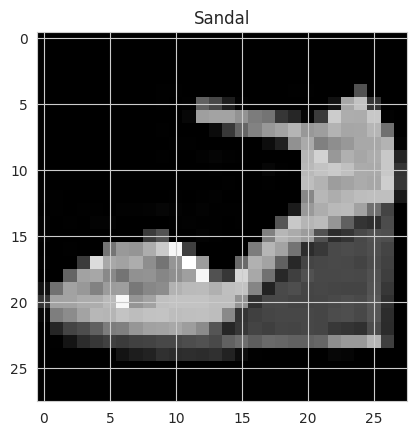

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


i = random.randint(1,60000)
plt.imshow(train[i,1:].reshape((28,28)))

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray')
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")


In [ ]:
label = train[i,0]
label

5.0

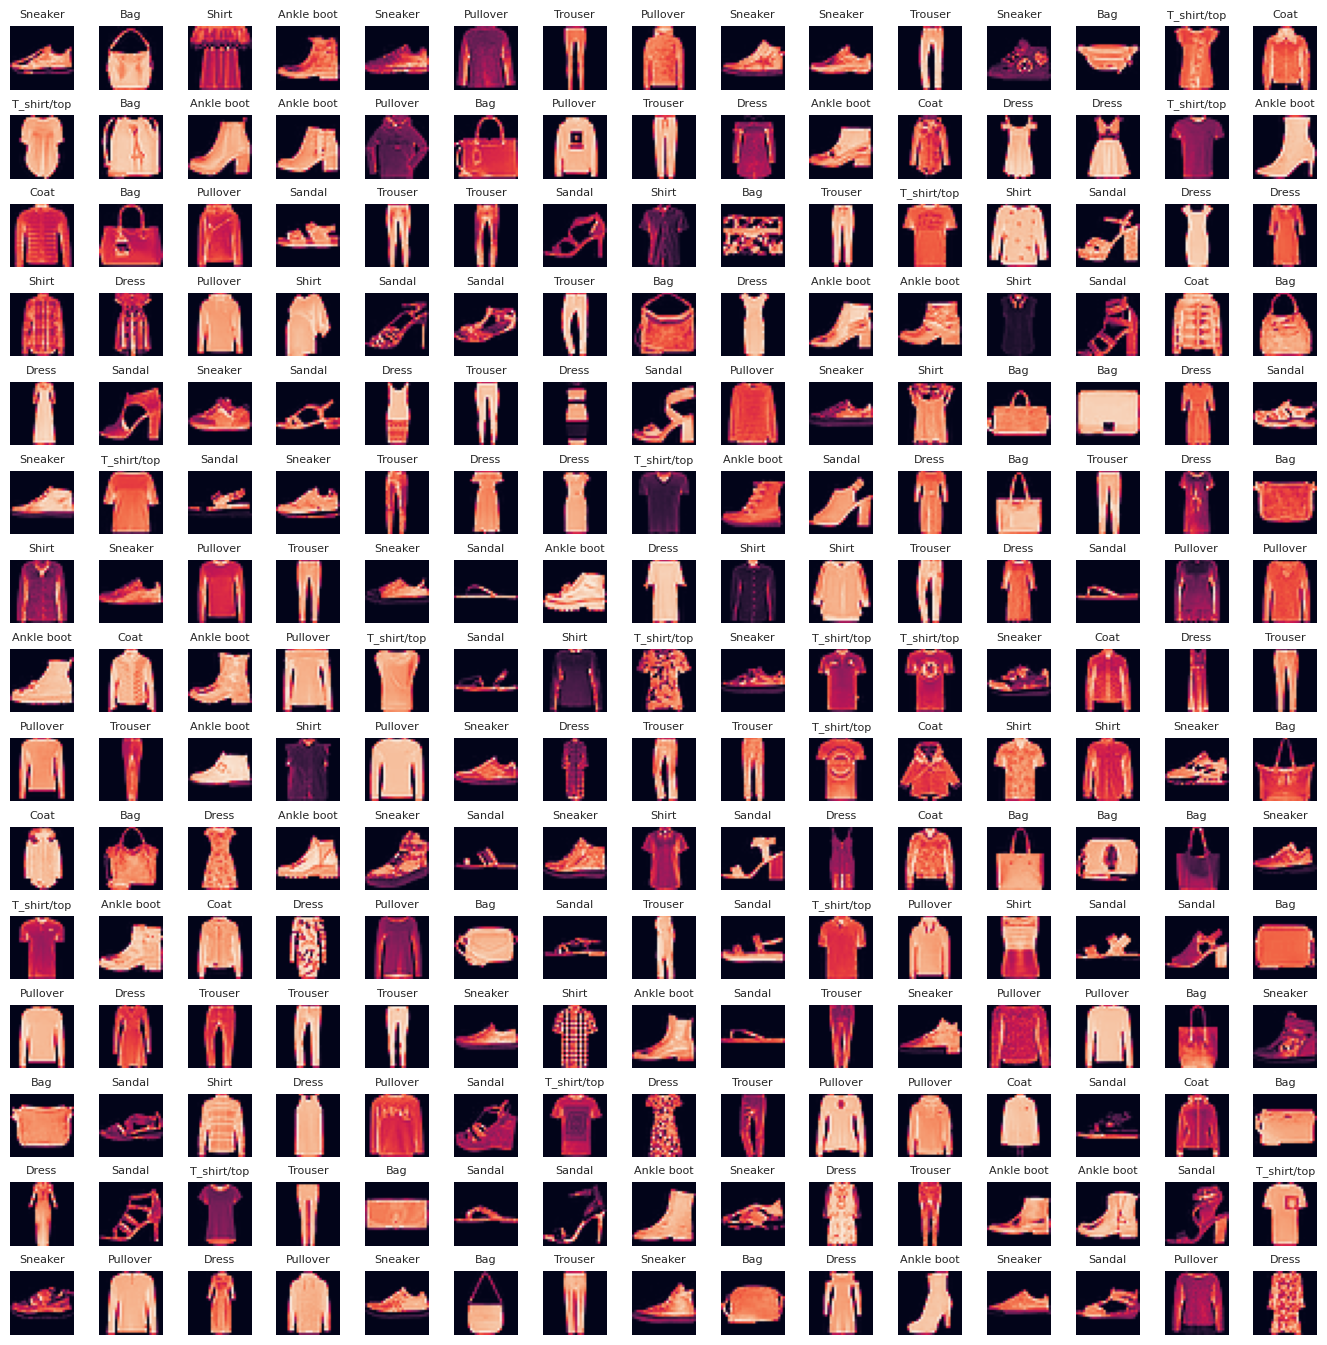

In [ ]:
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel()

n_train = len(train)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_train)
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

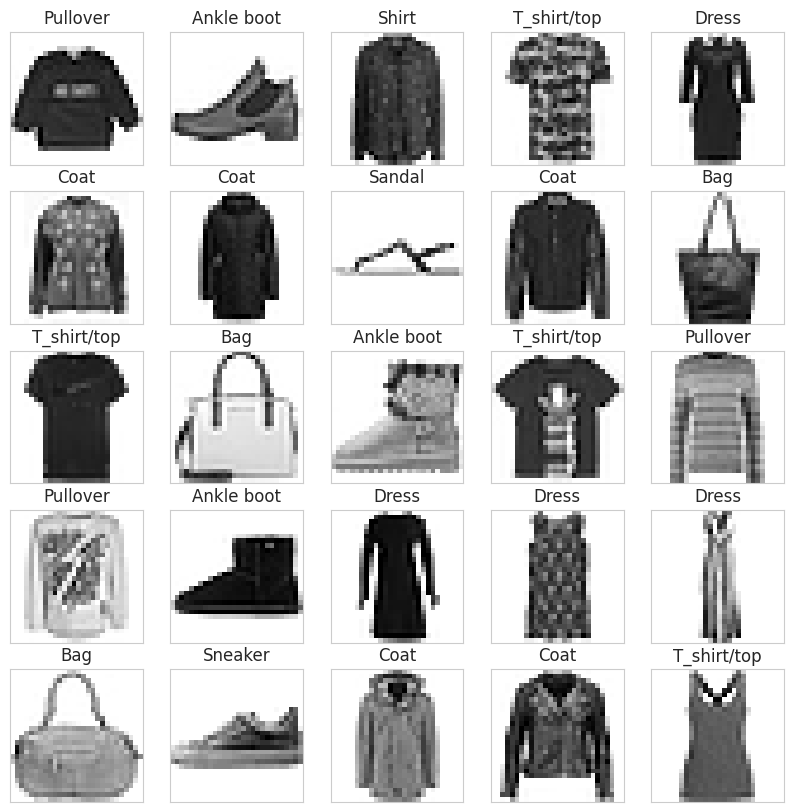

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Class distribution in testing set')

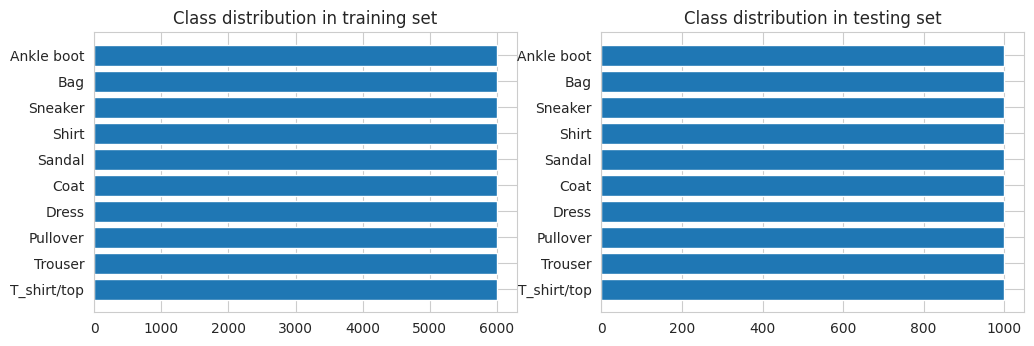

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

# **TRAINING THE MODEL¶**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [ ]:

X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


# Building the **model**

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

# Train the **model**

In [ ]:
epochs = 25
batch_size = 1024

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 328s 7s/step - accuracy: 0.8462 - loss: 0.4262 - val_accuracy: 0.3799 - val_loss: 2.5977
Epoch 2/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 343s 6s/step - accuracy: 0.8705 - loss: 0.3573 - val_accuracy: 0.3738 - val_loss: 2.8347
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.8804 - loss: 0.3274 - val_accuracy: 0.4079 - val_loss: 2.7506
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 307s 6s/step - accuracy: 0.8906 - loss: 0.3046 - val_accuracy: 0.4623 - val_loss: 2.1777
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.8970 - loss: 0.2887 - val_accuracy: 0.5088 - val_loss: 1.8008
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 0.8997 - loss: 0.2725 - val_accuracy: 0.6421 - val_loss: 1.1635
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 323s 6s/step - accuracy: 0.9049 - loss: 0.2597 - val_accuracy: 0.8115 - val_loss: 0.5150
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 313s 6s/step - accuracy: 0.9080 - loss: 0.2530 - val_accuracy: 0.8502 - v

NameError: name 'history' is not defined

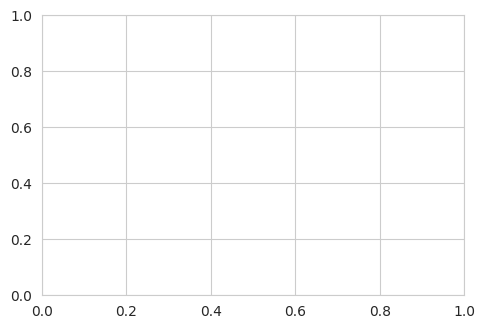

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

# EVALUATING THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

# MAKE PREDICTIONS

In [ ]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [ ]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

In [ ]:
np.argmax(prediction[0])

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))